In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

df = pd.read_excel(r"C:\Users\Thomas Wai\OneDrive - AGSE\Desktop\Python\Online Retail.xlsx")

# Show the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
# Check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
# Check missing values
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [4]:
df[df['CustomerID'].isnull()].head()
df[df['UnitPrice'] == 0].head()
df[df['Quantity'] < 0].head()
df[df['Description'].isnull() | df['Description'].str.contains(r'\?|missing|display|sold as set', case=False, na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [5]:
# create a copy of cleaned dataset
df_cleaned = df[
    df['CustomerID'].notnull() &
    (df['UnitPrice'] > 0) &
    (df['Quantity'] > 0) &
    (df['Description'].notnull()) &
    (~df['Description'].str.contains(r'\?|missing|display|sold as set', case=False, na=False))
].copy()

# Replace 'EIRE' with 'Ireland'
df_cleaned['Country'] = df_cleaned['Country'].replace('EIRE', 'Ireland')

In [6]:
# Total Sales Per Country
# Add Sales column
df_cleaned['Sales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by Country and sort
top_countries = df_cleaned.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(5)

# Display result
print("🌍 Top 5 Countries by Total Sales:")
print(top_countries)

🌍 Top 5 Countries by Total Sales:
Country
United Kingdom    7308264.684
Netherlands        285446.340
Ireland            265545.900
Germany            228867.140
France             209024.050
Name: Sales, dtype: float64


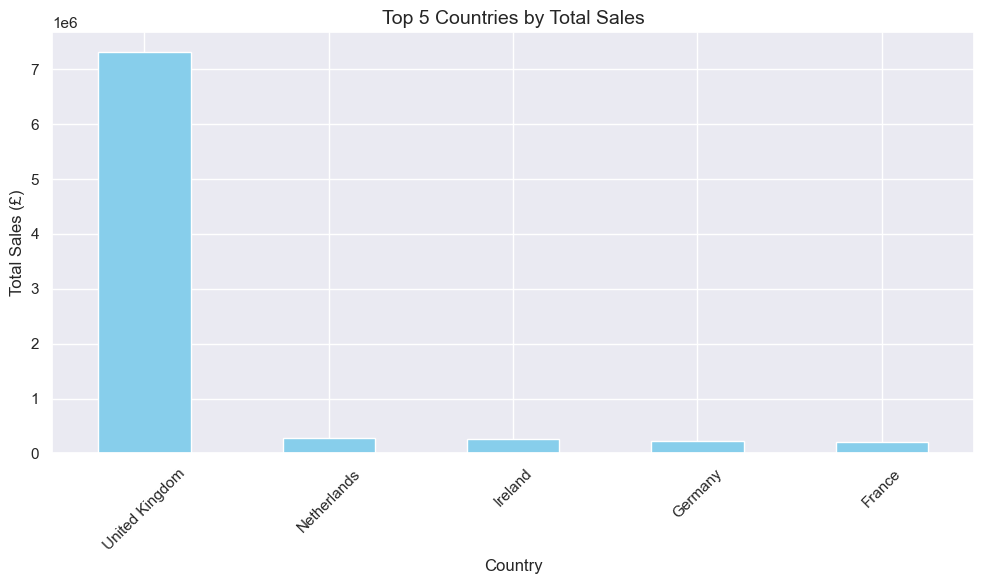

In [7]:
# Group and sort real sales data from df_cleaned
df_cleaned['Sales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
top_countries = df_cleaned.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(5)

# Create bar chart
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 5 Countries by Total Sales", fontsize=14)
plt.ylabel("Total Sales (£)", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart to file
plt.savefig("top_5_sales_countries.png")
plt.show()

In [8]:
# Calculate and display the mean and median of Quantity in cleaned data
mean_qty = df_cleaned['Quantity'].mean()
median_qty = df_cleaned['Quantity'].median()

print(f"Mean Quantity: {mean_qty:.2f}")
print(f"Median Quantity: {median_qty:.2f}")

Mean Quantity: 12.99
Median Quantity: 6.00


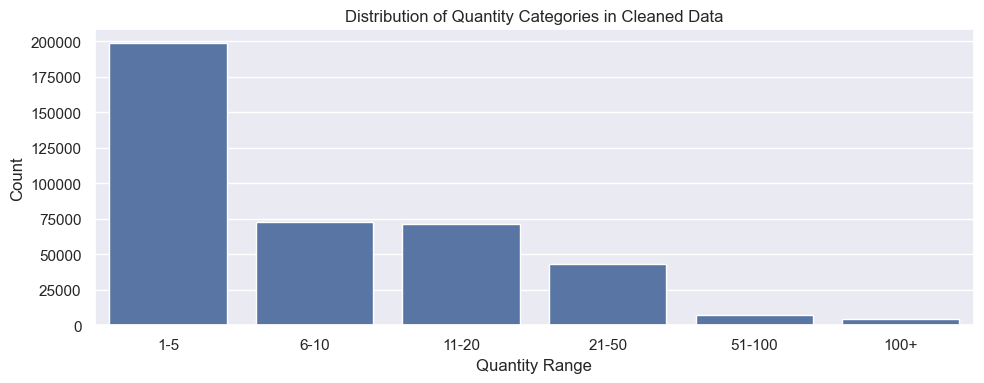

In [9]:
# Categorize Quantity into bins
quantity_bins = [0, 5, 10, 20, 50, 100, df_cleaned['Quantity'].max()]
quantity_labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '100+']
df_cleaned['QuantityCategory'] = pd.cut(df_cleaned['Quantity'], bins=quantity_bins, labels=quantity_labels, right=True)

# Plot bar chart of quantity categories
plt.figure(figsize=(10, 4))
sns.countplot(x='QuantityCategory', data=df_cleaned, order=quantity_labels)
plt.title("Distribution of Quantity Categories in Cleaned Data")
plt.xlabel("Quantity Range")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#Small Orders Dominate: The majority of transactions fall in the 1–5 and 6–10 quantity range. This suggests that most customers are placing relatively small orders.
#Right-Skewed Distribution: The distribution clearly skews to the right — large quantity orders are rare. This is typical in retail where bulk orders are exceptions, not the norm.
#Mean > Median: The mean (~13) is greater than the median (6), which confirms the right skew. A few large orders are pulling the average upward.
#Outlier Management Justified: Given how infrequent large orders are, it's reasonable to further investigate or cap high-quantity outliers for cleaner trend analysis or modeling.

In [10]:
# Define what qualifies as a large order
large_orders = df_cleaned[df_cleaned['Quantity'] > 50]

# Group by Description and sum Quantity
top_large_order_products = (
    large_orders.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Display top 5 products by quantity in large orders
print("Top 5 Products Frequently Ordered with quantity greater than 50:")
print(top_large_order_products)


Top 5 Products Frequently Ordered with quantity greater than 50:
Description
PAPER CRAFT , LITTLE BIRDIE          80995
MEDIUM CERAMIC TOP STORAGE JAR       75463
WORLD WAR 2 GLIDERS ASSTD DESIGNS    37392
JUMBO BAG RED RETROSPOT              31260
POPCORN HOLDER                       23135
Name: Quantity, dtype: int64


In [11]:
# Filter for small quantity orders
low_quantity = df_cleaned[df_cleaned['Quantity'] < 10]

# Group by Description and sum the Quantity
top5_low_quantity = (
    low_quantity.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print(top5_low_quantity)

Description
WHITE HANGING HEART T-LIGHT HOLDER    5574
ASSORTED COLOUR BIRD ORNAMENT         4884
PARTY BUNTING                         4603
NATURAL SLATE HEART CHALKBOARD        3629
REGENCY CAKESTAND 3 TIER              3392
Name: Quantity, dtype: int64
